In [1]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path=".", verbose=True):
    files = os.listdir(path)
    if isinstance(pattern, str):
        matches = [x for x in files if pattern in x]
    elif isinstance(pattern, list):
        if len(pattern) == 2:
            matches = [x for x in files if pattern[0] in x and pattern[1] in x]
        else:
            return "Give 2 patterns at most"
    if verbose:
        print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax

In [2]:
val_losses_32 = get_content("val_losses", path="../DEFAULT2")
train_losses_32 = get_content("train_losses", path="../DEFAULT2")
val_metrics_32 = get_content("val_metrics", path="../DEFAULT2")
train_metrics_32 = get_content("train_metrics", path="../DEFAULT2")
duration_32 = get_content("duration", path="../DEFAULT2")

prefix_16 = "ed16-kb150-pl150_model-conv128-fcnn128"
val_losses_16 = get_content(f"{prefix_16}-val_losses")
train_losses_16 = get_content(f"{prefix_16}-train_losses")
val_metrics_16 = get_content(f"{prefix_16}-val_metrics")
train_metrics_16 = get_content(f"{prefix_16}-train_metrics")
duration_16 = get_content(f"{prefix_16}-duration")

prefix_24 = "ed24-kb150-pl150_model-conv128-fcnn128"
val_losses_24 = get_content(f"{prefix_24}-val_losses")
train_losses_24 = get_content(f"{prefix_24}-train_losses")
val_metrics_24 = get_content(f"{prefix_24}-val_metrics")
train_metrics_24 = get_content(f"{prefix_24}-train_metrics")
duration_24 = get_content(f"{prefix_24}-duration")

prefix_40 = "ed40-kb150-pl150_model-conv128-fcnn128"
val_losses_40 = get_content(f"{prefix_40}-val_losses")
train_losses_40 = get_content(f"{prefix_40}-train_losses")
val_metrics_40 = get_content(f"{prefix_40}-val_metrics")
train_metrics_40 = get_content(f"{prefix_40}-train_metrics")
duration_40 = get_content(f"{prefix_40}-duration")

prefix_48 = "ed48-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128"
val_losses_48 = get_content(f"{prefix_48}-val_losses")
train_losses_48 = get_content(f"{prefix_48}-train_losses")
val_metrics_48 = get_content(f"{prefix_48}-val_metrics")
train_metrics_48 = get_content(f"{prefix_48}-train_metrics")
duration_48 = get_content(f"{prefix_48}-duration")

prefix_64 = "ed64-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128"
val_losses_64 = get_content(f"{prefix_64}-val_losses")
train_losses_64 = get_content(f"{prefix_64}-train_losses")
val_metrics_64 = get_content(f"{prefix_64}-val_metrics")
train_metrics_64 = get_content(f"{prefix_64}-train_metrics")
duration_64 = get_content(f"{prefix_64}-duration")

Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed16-kb150-pl150_model-conv128-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed16-kb150-pl150_model-conv128-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


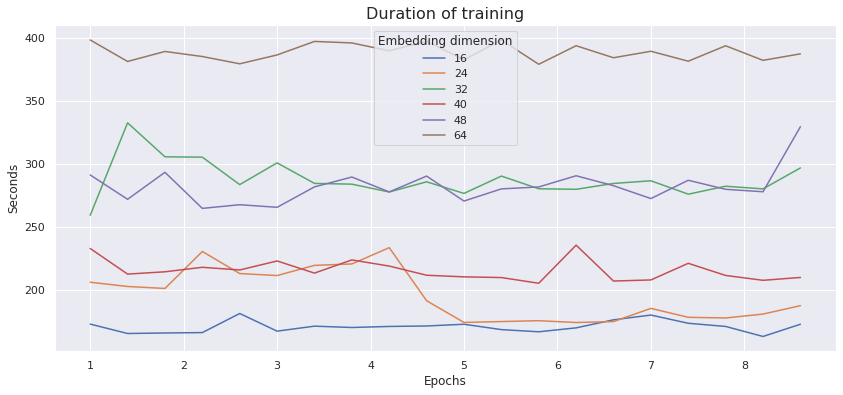

In [3]:
ax = plot_lists([duration_16, duration_24, duration_32, duration_40, duration_48, duration_64], legend=[16,24,32,40,48,64], legend_title="Embedding dimension")
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(list(range(len(duration_16))))
_ = ax.set_ylabel("Seconds")

In [5]:
df = pd.DataFrame([duration_16, duration_24, duration_32, duration_40, duration_48, duration_64], index=[16,24,32,40,48,64])
df.mean(axis=1)

16    171.130776
24    195.883472
32    287.671102
40    215.700673
48    282.367429
64    388.473387
dtype: float64

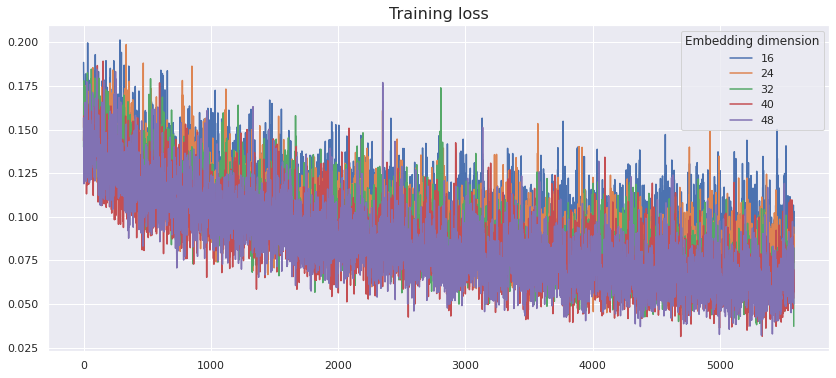

In [6]:
ax = plot_lists([train_losses_16[500:], train_losses_24[500:], train_losses_32[500:], train_losses_40[500:], train_losses_48[500:]], legend=[16,24,32,40, 48], legend_title="Embedding dimension")
_ = ax.set_title("Training loss", fontsize=16)

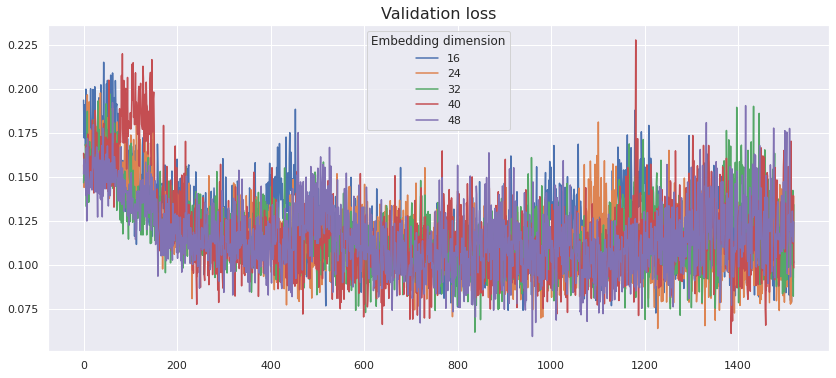

In [7]:
ax = plot_lists([val_losses_16, val_losses_24, val_losses_32, val_losses_40, val_losses_48], legend=[16,24,32,40,48], legend_title="Embedding dimension")
_ = ax.set_title("Validation loss", fontsize=16)

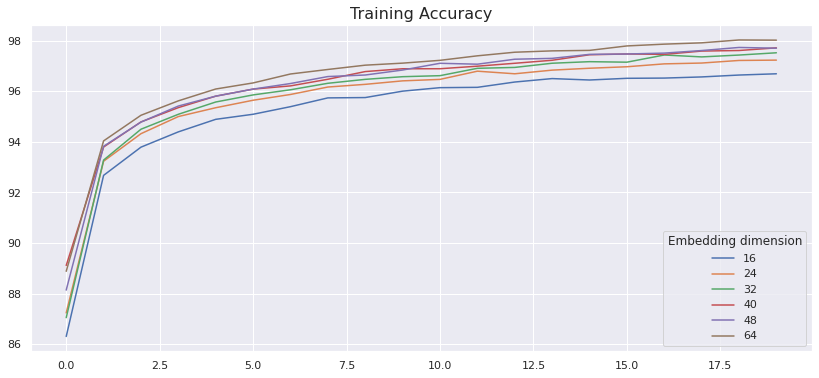

In [8]:
ax = plot_lists([train_metrics_16[:,0], train_metrics_24[:,0], train_metrics_32[:,0], train_metrics_40[:,0], train_metrics_48[:,0], train_metrics_64[:,0]], legend=[16,24,32,40,48,64], legend_title="Embedding dimension")
_ = ax.set_title("Training Accuracy", fontsize=16)

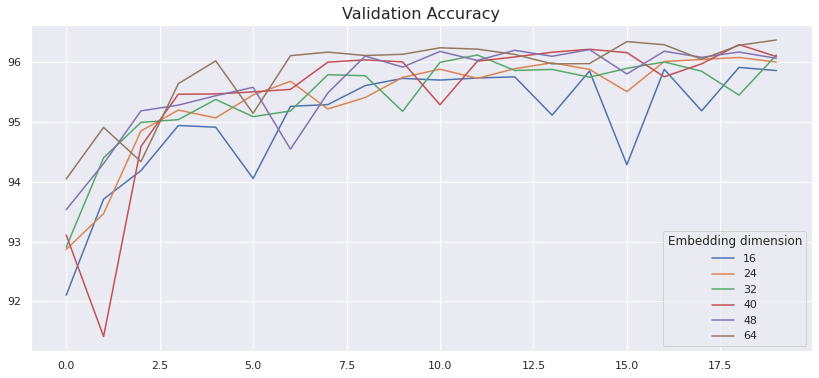

In [10]:
ax = plot_lists([val_metrics_16[:,0], val_metrics_24[:,0], val_metrics_32[:,0], val_metrics_40[:,0], val_metrics_48[:,0], val_metrics_64[:,0]], legend=[16,24,32,40,48,64], legend_title="Embedding dimension")
_ = ax.set_title("Validation Accuracy", fontsize=16)

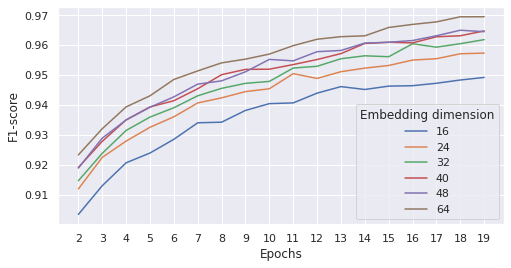

In [11]:
ax = plot_lists([train_metrics_16[:,1][2:], 
            train_metrics_24[:,1][2:], 
            train_metrics_32[:,1][2:], 
            train_metrics_40[:,1][2:],
            train_metrics_48[:,1][2:], 
            train_metrics_64[:,1][2:]],
                legend=[16,24,32,40,48,64], 
                x = range(2,20),
                figsize=(8,4),
                legend_title="Embedding dimension")
ax.set_xticks(range(2,20))
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("F1-score")

In [12]:
df = pd.DataFrame([train_metrics_16[:,1][:], 
            train_metrics_24[:,1][:], 
            train_metrics_32[:,1][:], 
            train_metrics_40[:,1][:],
            train_metrics_48[:,1][:],
            train_metrics_64[:,1][2:]], 
                index=[16,24,32,40,48,64])
df[[15,16,17,18,19]].mean(axis=1)

16    0.947489
24    0.955604
32    0.959628
40    0.962463
48    0.963004
64    0.968894
dtype: float64

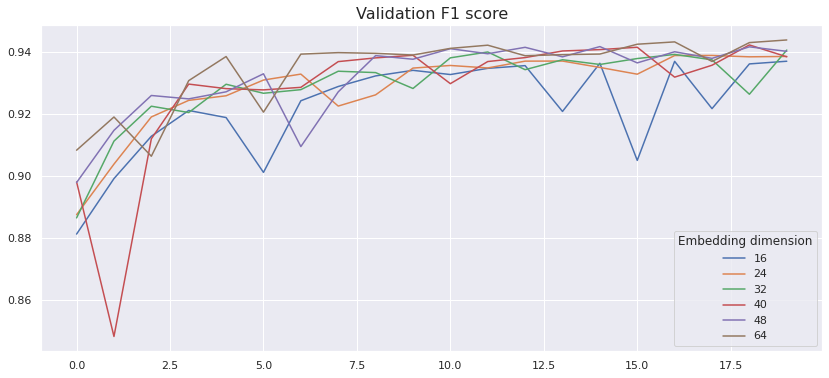

In [13]:
ax = plot_lists([val_metrics_16[:,1], 
            val_metrics_24[:,1], 
            val_metrics_32[:,1], 
            val_metrics_40[:,1],
            val_metrics_48[:,1],
            val_metrics_64[:,1]], 
                legend=[16,24,32,40,48,64], 
                legend_title="Embedding dimension")
_ = ax.set_title("Validation F1 score", fontsize=16)

In [14]:
df = pd.DataFrame([val_metrics_16[:,1], 
            val_metrics_24[:,1], 
            val_metrics_32[:,1], 
            val_metrics_40[:,1],
            val_metrics_48[:,1],
            val_metrics_64[:,1]], 
                index=[16,24,32,40,48,64])
df[[15,16,17,18,19]].mean(axis=1)

16    0.927323
24    0.937447
32    0.936245
40    0.937900
48    0.939202
64    0.941847
dtype: float64